In [1]:
'''
Importing libraries

    pandas for data manipulation
    matplotlib for data visualization
    
'''
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/j0/_lzs0m5d35d21tm0zdtkqgx40000gn/T/ipykernel_84762/1841465291.py:8: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Next, it is necessary to implement the dataset of the world population. This dataset will be stored in the variable called wp

In [2]:
wp = pd.read_csv('world_population_data.csv')


We can see that the dataset contains 234 rows and 17 columns. The main features of the data set are obtained by using the method 'describe()'  

In [3]:
wp.describe()

,rank,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²)
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000
mean,117.500000,3.437442e+07,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814500e+05,451.282051
std,67.694165,1.373864e+08,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,1979.398922
min,1.000000,5.180000e+02,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,4.400000e-01,0.000000
25%,59.250000,4.225982e+05,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,39.500000
50%,117.500000,5.643895e+06,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,97.500000
75%,175.750000,2.324537e+07,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,242.750000
max,234.000000,1.428628e+09,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,21403.000000


The previous result shows that there are 11 columns with data type int64, 5 object columns and 1 column with float data. Also 

In [4]:
wp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              234 non-null    int64  
 1   cca3              234 non-null    object 
 2   country           234 non-null    object 
 3   continent         234 non-null    object 
 4   2023 population   234 non-null    int64  
 5   2022 population   234 non-null    int64  
 6   2020 population   234 non-null    int64  
 7   2015 population   234 non-null    int64  
 8   2010 population   234 non-null    int64  
 9   2000 population   234 non-null    int64  
 10  1990 population   234 non-null    int64  
 11  1980 population   234 non-null    int64  
 12  1970 population   234 non-null    int64  
 13  area (km²)        234 non-null    float64
 14  density (km²)     234 non-null    int64  
 15  growth rate       234 non-null    object 
 16  world percentage  234 non-null    object 
dt

In [5]:
wp2 = wp.copy()

In [6]:
wp2 = wp2.set_index(wp['country'])

<Axes: title={'center': 'Top 15 countries with the largest population in 1970'}, ylabel='country'>

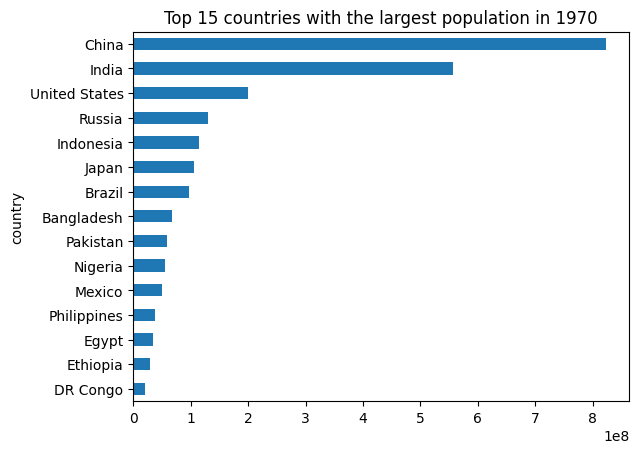

In [13]:
wp2['1970 population'].head(15).sort_values(ascending=True).plot(kind='barh',title='Top 15 countries with the largest population in 1970')

<Axes: title={'center': 'Top 15 countries with the largest population in 2023'}, ylabel='country'>

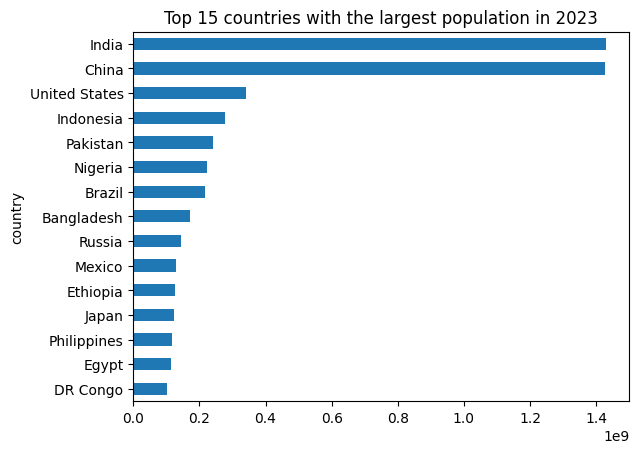

In [14]:
wp2['2023 population'].head(15).sort_values(ascending=True).plot(kind='barh',title='Top 15 countries with the largest population in 2023')

The plots tell us that China, India, and the USA are the three countries with the most population from 1970 to 2023. In the middle, we observe that the population of Russia and Japan has decreased over the years. In the other hand, we notice that the population of Pakistan and Nigeria has increased significantly.  


Now, if we see again the information about the data type of 'world percentage' we note that it is an object. Therefore we need to transform it to a number. 

In [8]:
def remove_percentage(x):
    return x.replace('%', '')

In [9]:
remove_percentage('hello%world%')

'helloworld'

Then we apply the remove_percentage to the 'world percentage' column:

In [10]:
wp2['world percentage'] = wp2['world percentage'].apply(remove_percentage)

In [11]:
wp2['world percentage']

country
India               17.85
China               17.81
United States        4.25
Indonesia            3.47
Pakistan             3.00
                    ...  
Montserrat           0.00
Falkland Islands     0.00
Niue                 0.00
Tokelau              0.00
Vatican City         0.00
Name: world percentage, Length: 234, dtype: object

In [12]:
wp2.to_csv('world_p_file.csv',index=False)

Finally in the last command line I saved the dataframe in csv format to process it in other visualization tools like Tableau or Power BI 